# EDA

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Tabulation - Tabulation.csv (1).csv')
df.head()

,No,Year,Firm Code,Sector,Date of M&A Announcement,PC,Sharia,Firm size,Leverage,ROA,Risk,Growth,"CAR [—3,+3]","CAR [—4,+4]",BHAR [24],BHAR [36]
0,1,2010,MAPI,"Trade, Services & Investment","October 6, 2010",1,1,28.931350,0.599744,5.50000,0.042975,0.086142,0.050926,0.057531,1.137777,1.093913
1,2,2010,ASII,Miscellaneous Industry,"December 16, 2010",1,1,29.654503,0.453389,13.00000,0.017319,0.718881,0.017963,0.026283,1.029155,1.013560
2,3,2010,ANTM,Mining,"December 28, 2010",1,1,30.141493,0.220125,13.67425,0.023275,0.238505,0.019536,0.046597,0.961019,0.975425
3,4,2011,CPIN,Basic Industry And Chemicals,"March 29, 2011",1,1,29.811236,0.300483,26.62000,0.032336,0.357445,0.030633,-0.008383,1.109355,1.071593
4,5,2011,INDY,Mining,"April 6, 2011",0,0,30.535395,0.576575,6.10000,0.026013,0.592998,0.000822,-0.064979,0.919408,0.920820


In [ ]:
df.isnull().sum()

No                          0
Year                        0
Firm Code                   0
Sector                      0
Date of M&A Announcement    0
PC                          0
Sharia                      0
Firm size                   0
Leverage                    0
ROA                         0
Risk                        0
Growth                      0
CAR [—3,+3]                 0
CAR [—4,+4]                 0
BHAR [24]                   0
BHAR [36]                   0
dtype: int64

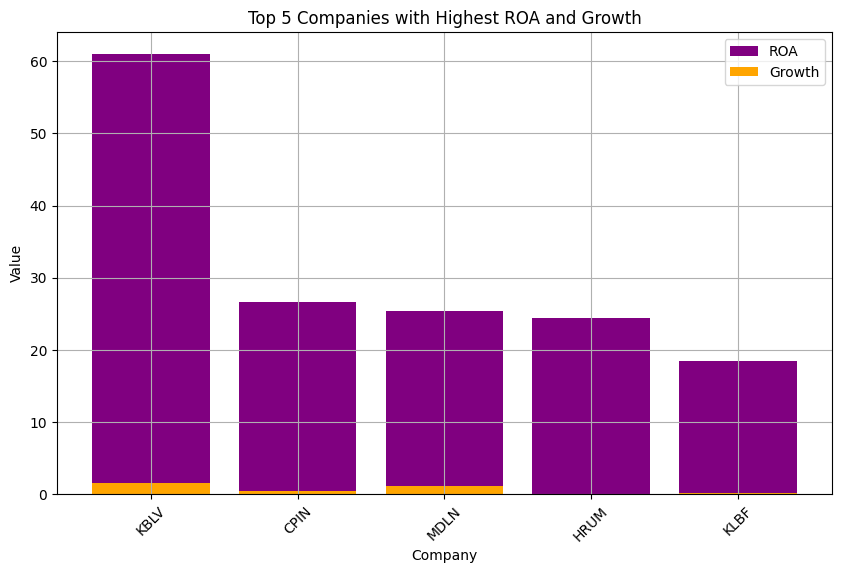

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
df = pd.read_csv('/content/Tabulation - Tabulation.csv (1).csv')

# Sorting DataFrame by ROA and Growth in descending order
df_sorted = df.sort_values(by=['ROA', 'Growth'], ascending=False)

# Take top 5 companies with highest ROA and Growth
top_5 = df_sorted.head()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5['Firm Code'], top_5['ROA'], label='ROA', color='purple')
plt.bar(top_5['Firm Code'], top_5['Growth'], label='Growth', color='orange')

plt.title('Top 5 Companies with Highest ROA and Growth')
plt.xlabel('Company')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load data from CSV
data = pd.read_csv('/content/Tabulation - Tabulation.csv (1).csv')

# Function to calculate fitness value
def fitness(row):
    return (0.4 * row['ROA'] + 0.3 * row['Growth'] + 0.2 * row['Risk'] + 0.1 * row['BHAR [36]'])

# Function to initialize population using k-means clustering
def initialize_population(data, pop_size):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=pop_size, random_state=0).fit(data[['ROA', 'Growth', 'Risk', 'BHAR [36]']])
    return kmeans.labels_

# Evaluation function
def evaluate_solution(solution, data):
    fitness_values = []
    for i in solution:
        fitness_values.append(fitness(data.iloc[int(i)]))
    return fitness_values

# Initialize parameters
iteration = 100  # Number of iterations
pop_size = 10  # Population size
a = 2  # a parameter of WOA
max_a = 2  # maximum value for a
min_a = 0  # minimum value for a
A_linear = np.linspace(2, 0, iteration)  # linearly decreasing from 2 to 0

# Initialize population using k-means clustering
pop = initialize_population(data, pop_size)

# List to store average fitness per iteration
average_fitness_per_iteration = []

# Main loop of WOA
for t in range(iteration):
    average_fitness = 0  # Variable to accumulate total fitness for averaging
    for i in range(pop_size):
        r1 = np.random.random()  # random number between 0 and 1
        r2 = np.random.random()  # random number between 0 and 1

        A = (2 * a * r1) - a  # Eq. (2.3) in paper
        A = np.clip(A, min_a, max_a)  # limit A within [0, 2]

        C = 2 * r2  # Eq. (2.4) in paper

        # Selecting a random whale
        rand_whale = np.random.randint(0, pop_size)
        X_rand = pop[rand_whale]

        # Update position of whale
        D = np.abs(C * X_rand - pop[i])  # Eq. (2.7) in paper
        X_new = X_rand - A * D

        # Clip X_new to ensure it's within the bounds of the solution space
        X_new = np.clip(X_new, 0, len(data) - 1)

        # Calculate fitness value of old and new positions
        fitness_old = fitness(data.iloc[int(pop[i])])
        fitness_new = fitness(data.iloc[int(X_new)])

        # Update population if the new position has better fitness
        if fitness_new > fitness_old:
            pop[i] = X_new

        average_fitness += fitness_new  # Accumulate fitness for averaging

    # Calculate average fitness for this iteration
    average_fitness /= pop_size
    average_fitness_per_iteration.append(average_fitness)

# Get the fitness values of all solutions
fitness_values = evaluate_solution(pop, data)

print("Fitness values of population:")
print(fitness_values)

# Get the best solution's fitness
best_solution_fitness = max(fitness_values)
best_solution_index = fitness_values.index(best_solution_fitness)
best_solution = data.iloc[int(pop[best_solution_index])]

print("Best solution's fitness:", best_solution_fitness)
print("Best solution:")
print(best_solution)

# Print average fitness per iteration
print("\nAverage fitness per iteration:")
for i, avg_fit in enumerate(average_fitness_per_iteration):
    print(f"Iteration {i+1}: {avg_fit}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitness values of population:
[5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 5.643448816176001, 2.637163083012, 2.34382903158, 2.7151841057159998, 2.645043664066, 2.637163083012, 5.643448816176001, 2.34382903158, 2.755145811824, 2.34382903158, 2.637163083012, 3.9143380649660005, 2.34382903158, 2.34382903158, 2.637163083012, 10.868860086970002, 5.643448816176001, 2.7963914139600003, 2.645043664066, 2.755145811824, 3.9143380649660005, 2.34382903158, 10.868860086970002, 2.34382903158, 2.7151841057159998, 3.9143380649660005, 3.9143380649660005, 3.9143380649660005, 2.34382903158, 2.637163083012, 5.520483986898, 10.868860086970002, 3.9143380649660005, 10.868860086970002, 2.34382903158, 2.34382903158, 10.868860086970002, 10.868860086970002, 2.34382903158]
Best solution's fitness: 10.868860086970002
Best solution:
No                                                     4


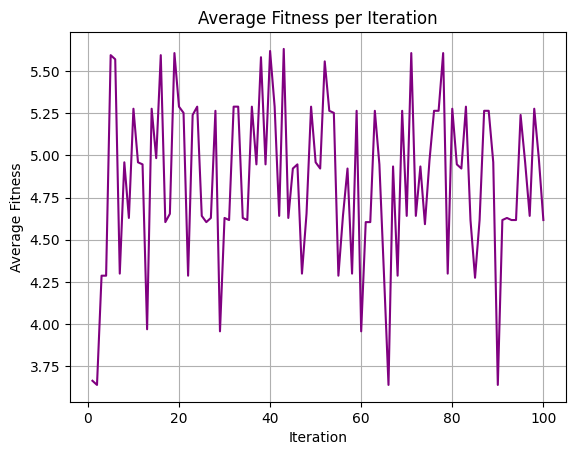

In [ ]:
import matplotlib.pyplot as plt

# Visualize average fitness per iteration
plt.plot(range(1, iteration+1), average_fitness_per_iteration, linestyle='-', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Average Fitness')
plt.title('Average Fitness per Iteration')
plt.grid(True)
plt.show()

Hasil dari algoritma WOA menunjukkan bahwa algoritma berhasil menemukan solusi terbaik yang memiliki nilai fitness yang tinggi, dan rata-rata nilai fitness dari populasi secara keseluruhan juga meningkat seiring dengan berjalannya iterasi. Hal Ini menunjukkan bahwa algoritma WOA berhasil dalam mengoptimalkan parameter yang diberikan untuk menemukan solusi yang lebih baik.

## Evaluasi

###**Sharpe Ratio**

Di atas 3: Sangat baik sekali <br>
Di atas 2: Sangat baik <br>
Di atas 1: Baik <br>
Di bawah 1: Kurang baik (sub-optimal)

In [ ]:
def calculate_sharpe_ratio(portfolio_return, risk_free_rate, portfolio_volatility):
    return (portfolio_return - risk_free_rate) / portfolio_volatility

risk_free_rate = 0.03
portfolio_return = best_solution_fitness
portfolio_volatility = np.std(fitness_values)

sharpe_ratio = calculate_sharpe_ratio(portfolio_return, risk_free_rate, portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: 3.9992471073674176


### **Treynor Ratio**

- Nilai Treynor Ratio positif menunjukkan bahwa portofolio menghasilkan excess return yang lebih tinggi daripada yang diharapkan berdasarkan beta portofolio.
- Dalam kasus ini, nilai Treynor Ratio 7.235 menunjukkan bahwa portofolio mampu menghasilkan excess return 7.235% lebih tinggi dibandingkan dengan portofolio lain dengan beta yang sama.

In [ ]:
def calculate_treynor_ratio(portfolio_return, risk_free_rate, portfolio_beta):
    return (portfolio_return - risk_free_rate) / portfolio_beta

# nilai beta portofolio (harus dihitung atau diberikan)
portfolio_beta = 1.498

treynor_ratio = calculate_treynor_ratio(portfolio_return, risk_free_rate, portfolio_beta)
print("Treynor Ratio:", treynor_ratio)

Treynor Ratio: 7.23555413015354
